# <font color=purple> End2End ML Ops solution using AutoAI generated Model ! </font>

### <font color="grey">Table of Contents</font>
* [ML Ops High Level Steps](#cpd-features)
* [How to Get Started with Tutorial!](#get-started)
* [Check for all necessary Assets](#validate-assets)
* [Prerequisites](#prereqs)
* [Confirm what you have in your Cloud Pak For Data cluster](#cluster-scenarios)
* [General Instructions for Tutorial](#general-instructions)
* [Tutorial Steps](#steps)

## <font color="darkblue">ML Ops High Level Steps</font> <a class="anchor" id="cpd-features"></a>

Operationalization of Models or ML Ops is necessary for enterprises to get business value out of Data Science models

The key steps in ML Ops are -

- Data Provisioning with Governance
- Data Preparation
- Model Development
- Model Validation (& Governance)
- Model Deployment & Insight Consumption in Production
- Model Monitoring and
- Continuous Integration and Deployment of Models across various Environments

Diagram below shows these high level steps of ML-Ops and maps the Technologies/Components of Cloud Pak For Data those can be potentially used for implementing those steps. In this tutorial we are covering the steps - Data Provisioning, Data Preparation, Model Development, Model Deployment & Insight Consumption, and Model Monitoring. The Components of Cloud Pak For Data,those are used in this Tutorial, are highlighted in Red.

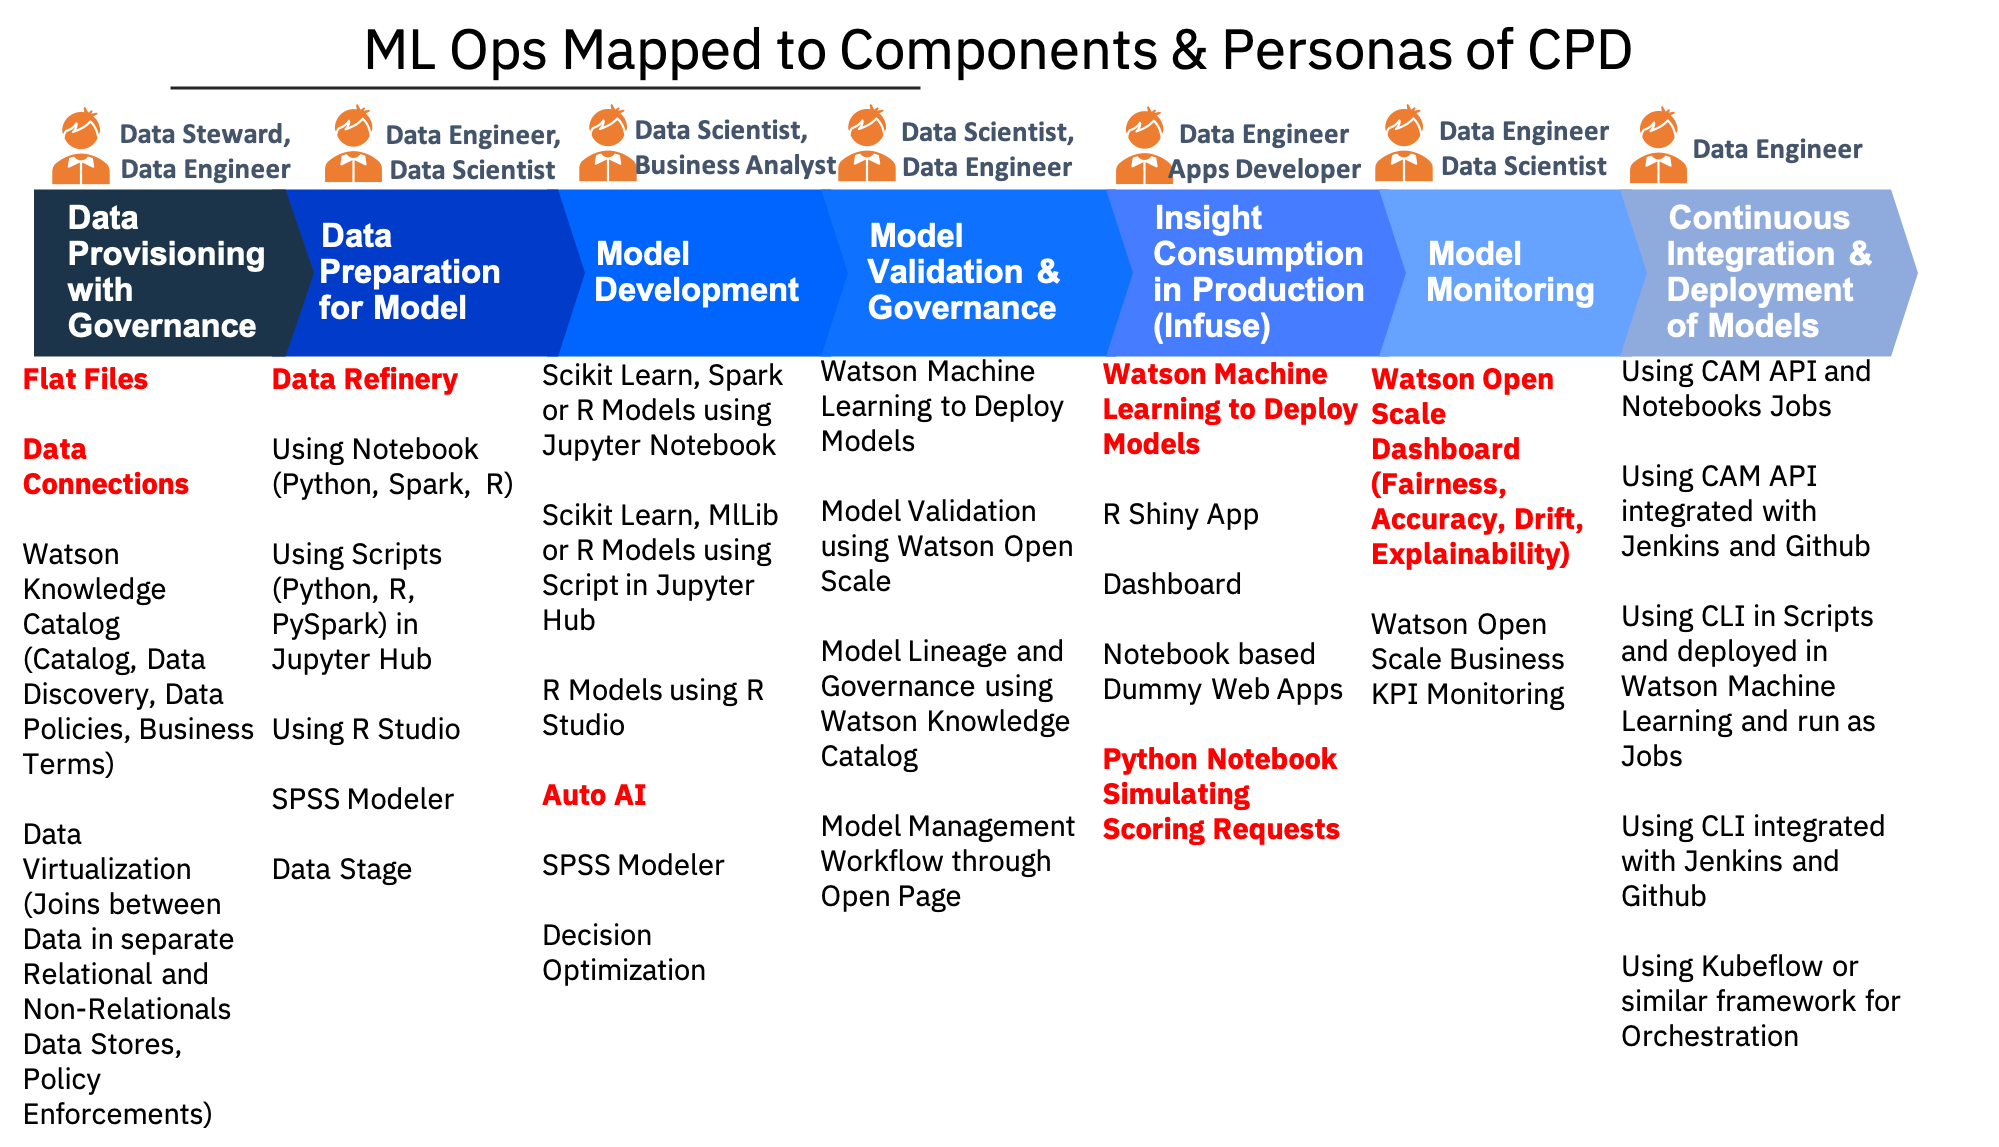

## <font color="darkblue">How to Get Started with Tutorial!</font> <a class="anchor" id="get-started"></a>


#### Please ensure the following step is executed prior to going through the tutorial steps:

1. If you have opened this Notebook in View Mode (by clicking the Name of the Notebook form the Asset tab of Project), Go to the top Toolbar of this Notebook. Click the Edit Icon to change the Notebook from View to Edit Mode. 
2. Come and select this current cell.
3. Click on Cell in the top menu. Select "Run All Below" once. After that, the links in the tutorial steps would be configured (See image below). <font color=red>*You may access the code for notebooks/links code by clicking on "Show Code" toggle button at the end of this notebook!*</font>
4. After that scroll up to come back to this section

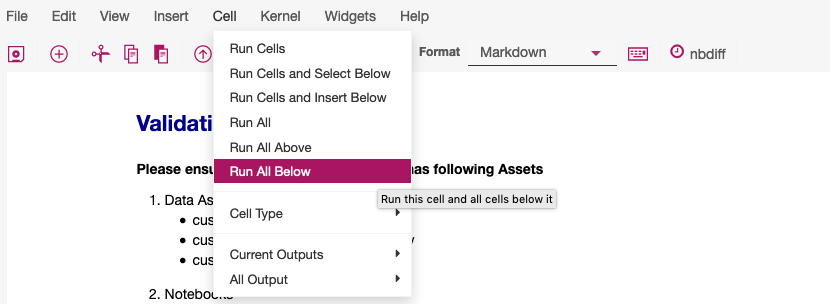

## <font color="darkblue">Check for all necessary Assets</font> <a class="anchor" id="validate-assets"></a>

#### Please ensure that the imported Project has following Assets by going to the Asset tab of the Project

- Data Assets
    + customer_usage_history.csv
    + customer_demographic_history.csv
    + customer_churn_quality_feedback.csv
     

- Notebooks
     + Adding a Data Connection
     + Data Preparation using Data Refinery
     + Deployment of Model using Watson Machine Learning
     + Getting Prediction from Model using REST for consuming Insight
     + Configuring Watson Open Scale using UI
     + Configuration of Open Scale for a specific Model
     + Configuration of Monitors in Watson Open Scale for a specific Model
     + Sending Multiple Scoring Requests to Deployed AutoAI created Model
     + Investigating Monitoring Results using UI of Watson Open Scale
     + Creating a Bucket in IBM Cloud Object Storage     
     
<font color = 'red'> Note: If you do not see all the notebooks or datasets in your project assets page, you can click on "View all" abd then "show more" to see all the assets. </font>

<br>

In [1]:
# @hidden_cell
from IPython.display import HTML

from project_lib import Project

project = Project.access()
assts = project.get_assets()
project_id = project.get_metadata()['metadata']['guid']
static_url_str1 = '/analytics/notebooks/v2/'
static_url_str2 = '/view?projectid='
static_url_str3 = '&context=icp4data'
def guid_from_notebook_name(assets, nb_name):
    return(next(item for item in assets if item["name"] == nb_name)['asset_id'])

## <font color="darkblue">Prerequisites</font><a class="anchor" id="prereqs"></a>

    
- You should also ensure that your user profile has the required permissions as below.
    + Create service instances
    + Access catalog
    + Access information assets
    + Author governance artifacts
    + Manage discovery
    + Manage information assets
    + Manage metadata import
    + Manage quality
    + View quality
    
    <font color = 'red'> Note: You can check the permission available for your profile by clicking the Right most Icon in the top toolbar. It will bring a drop down. There you can click on Profile and Settings. In the result page you can go to the Permission tab to check your Permission. Please note that only an Administrator can change your permissions. If you see that you don't have all required permission you need to request administrator to provide you Permission those are needed by all roles except Administrator and Data Steward. </font>
    
    
    

- The CPD components those need to be available in the CPD cluster are - 
    + Watson Studio with Refinery, Auto AI and Jupyter Notebook with Python Environment
    + Watson Machine Learning 
    + Watson Open Scale 
    
    
    
- Watson Open Scale needs to store the Monitoring data. For that you need to provide Watson Open Scale connection to a DB2 Warehouse
    + This DB2 Warehouse would be used by Watson Open Scale as its Datamart
    + This DB2 Warehouse can be in the current CPD cluster itself or anywhere else.
    + You may find that Datamart is already configured for Watson Open Scale in your cluster.
    + Otherwise, you must get from the Administrator the credentials of DB2 Warehouse -
        + Host Name or IP
        + Port
        + Database Name
        + Userid
        + Password
        
        

- Watson Open Scale also needs either Training Data or Statistics of Training Data.
    + You can provide Statistics of Training Data to Watson Open Scale by using a Json File. There is a Notebook that can help you to generate the Json file needed for this using your Training Data. *However, this option is not supported in this tutorial right now.*
    + You can provide the Training Data to Watson Open Scale through a DB2 Warehouse
        + Either in the DB2 Warehouse that is used by Watson Open Scale as its Datamart. 
        + Or you can provide the same in some other DB2 Warehouse
    + You can provide the Training Data to Watson Open Scale through a Bucket in IBM Cloud Object Store. You can go to IBM Cloud and can create the same as below. The steps are in the notebook below

In [2]:
# @hidden_cell

nb_name= 'Creating a Bucket in IBM Cloud Object Storage'
notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<p style = "text-indent : 5em;"><font size="3"><a href=""" + nb_url + """ target="_blank">""" + nb_name + """</a></p></font>"""
display(HTML(nb_html_str))

## <font color="darkblue">Confirm what you have in your Cloud Pak For Data cluster</font><a class="anchor" id="cluster-scenarios"></a>

- In Cloud Pak For Data Experience (Community/Free Edition) - 
    + You can get access to community edition of Cloud Pak For Data by going here https://www.ibm.com/cloud/paks/experiences/cloud-pak-for-data
    + It comes with -
        + Watson Studio with Refinery, Auto AI and Jupyter Notebook with Python Environment
        + Watson Machine Learning
        + Watson Open Scale
    + It has Watson Open Scale's Datamart already configured
    + For storing model Training Data you need to use IBM Cloud Object Storage 
    
    
    
    
- If you have access to a Cloud Pak For Data with Base Edition in a dedicated cluster (Paid)
    + It comes with -
        + Watson Studio with Refinery, Auto AI and Jupyter Notebook with Python Environment
        + Watson Machine Learning
    + You can only try up to Model Deployment steps (up to Step 4) of this tutorial in this Cluster
    
    
    
    
- If you have access to a Cloud Pak For Data with Standard Edition in dedicated cluster (Paid)
    + It comes with -
        + Watson Studio with Refinery, Auto AI and Jupyter Notebook with Python Environment
        + Watson Studio with Refinery, Auto AI and Jupyter Notebook with Python Environment
        + Watson Machine Learning
    + It does not have Watson Open Scale's Datamart already configured. For that you need to get a DB2 Warehouse connection
    + For storing model Training Data you can use the same DB2 Warehouse that is used for Datanart or IBM Cloud Object Storage 

<font color = 'red'> Note: You can check the Components those are enabled in your Cloud Pak For Data cluster by going to the Service Icon (4 small squares on 1 big square) in the right of the toolbar (right to the Search Icon). Click this Service Icon and open the page in a new Tab. There search for the respective Services/Components mentioned in Prerequisite list. If the tile of a Component shows 'Enabled' then you can use them in this Tutorial. </font>

## <font color="darkblue">General Instructions for Tutorial</font> <a class="anchor" id="general-instructions"></a>

#### Please follow these instructions for rest of the tutorial wherever you may need them

1. If you need to go to Project's Asset Tab or Deployment Space or any other page as a part of the instructions in this tutorial, instead of moving out of this overview Tutorial you can open the same using new Tab of the Browser. Keep this new tab of Browser open to go the Assets of the Project any time you want.

2. Once you have finished running some other Notebook, as a part of any Step/Instructions in this tutorial, please close that Tab. After that come back to this Overview Notebook to move to the next Step.

3. Always Open a Notebook in View mode (by clicking the Name of the Notebook form the Asset tab of Project). If you need to run any code in the Notebook go to the Edit button (on top tooolbar) to start the Notebook in Edit Mode.

4. You can access the documentation of various components of Cloud Pak For Data by following these steps -
    + Go to the documentation - [Cloud Pak For Data Documentation](https://www.ibm.com/support/producthub/icpdata/docs/content/SSQNUZ_current/cpd/overview/overview.html)
    + On the left navigation window click on the links for either Accessing Data or Governing and Curating Data or Analyzing Data or AI Solutions, etc, as needed.
    
    

5. Most of the Steps in this tutorial need you to run a Notebook specific to that Step. The Notebook name is given in the Step. You can either click the link provided with the Notebook link. Alternatively, you may go back to Assets page and run the the respective notebooks as mentioned in tutorial steps below.



        - Go to assets page

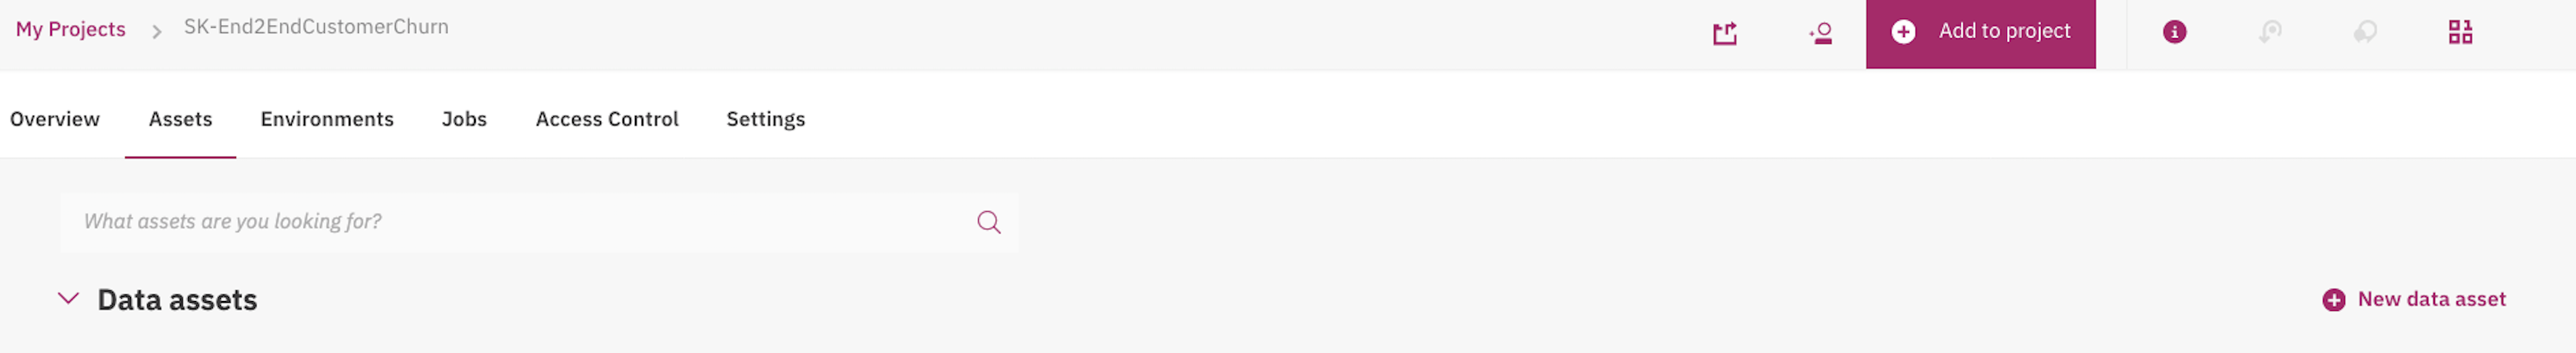

<br>

        - Scroll down to Notebooks on asset page and click on "view all" notebooks.

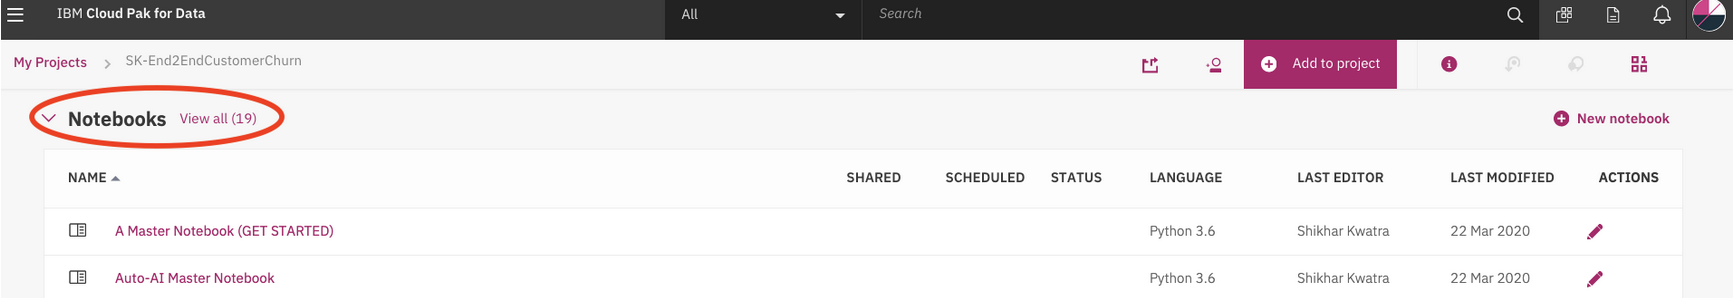

<br>

        - Run from the project page, the notebooks with respective names as indicated in Tutorial Steps.

<br>
<br>

## <font color="darkblue">Tutorial Steps</font> <a class="anchor" id="steps"></a>

### Step 1 - Data Provisioning and Governance

This step is important to ensure you have all necessary Datasets and Connections to create a Model, test a Model, update output from prediction of a Model to some Datbase, etc. 
Typically you will get the data from a Catalog. Or you can get the same from a Datasource Connection (DB2, Oracle, IBM Cloud Object Store, etc.) that you are already provided with. For this tutorial we have added the needed datasets as CSV file. 

However, you need to create a Data Connection, either a DB2wh Connection or a IBM Cloud Object Storage Connection, that has to be used to store the model training data in DB2Wh table. If you plan to use DB2 Warehouse Connection for the same use the Db2 Warehouse connection information you have got from administrator. If you plan to use IBM Cloud Object Storage you must create the same in the Prerequisite step and use its credential to create the datasource Connection.

To create a Data Connection open the Notebook provided below and execute the steps in the same.

In [3]:
# @hidden_cell

nb_name= 'Adding a Data Connection'
notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<font size="4"><a href=""" + nb_url + """ target="_blank">""" + "Adding a Data Connection" + """</a></font>"""
display(HTML(nb_html_str))

### Step 2 - Data Preparation For Model Development using Data Refinery

The Data Preparation step is important to create a dataset that can be used for developing a Model.

This step can be simple or complex depending on the requirement of the usecase/model. This may involve multiple substeps like Data Cleansing, Merging, Data Aggregation, Addiing new attributes for relevant feature for the Model, etc. All these can be implemented using various tools. 

In this tutorial we have shown a relatively simple Data Preparation step using Data Refinery. To start with the same use the Notebook below.

In [4]:
# @hidden_cell
nb_name = "Data Preparation using Data Refinery"
notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<font size="4"><a href=""" + nb_url + """ target="_blank">""" + nb_name + """</a></font>"""
display(HTML(nb_html_str))

### Step 3 - Developing Model using Auto AI

After Data Preparation the prepared datset would be used for developing Data Science Models.

This step can be simple or complex depending on the requirement of the usecase/model. This step may involve various substeps like Feature transformation from strings to numeric, Creating extra mathematical features, Splitting the data in Training and Test Dataset, Fearure selection, Iterations with multiple algorithms, Cross validation, etc. 

In this tutorial we have shown how to execute this Step using AutoAI component which does all these steps automatically.

#### Go to Asset tab of the Project. Select AutoAI model from "Add to Project". This will open a page where you have to provide name of the experiment , then click Create. 
#### In the next screen select the enhanced_customer_history.csv by clicking list that comes when you click ‘Select From Project’. In the next screen select Churn as your Prediction Column. Then click Experiment Setting . 
#### In the resulting page ensure you make holdout data split as 30%. Then click Save and Close. This will take you back to the previous screen. There click on Run Experiment. That will start the AutoAI experiments (as shown in the image below).


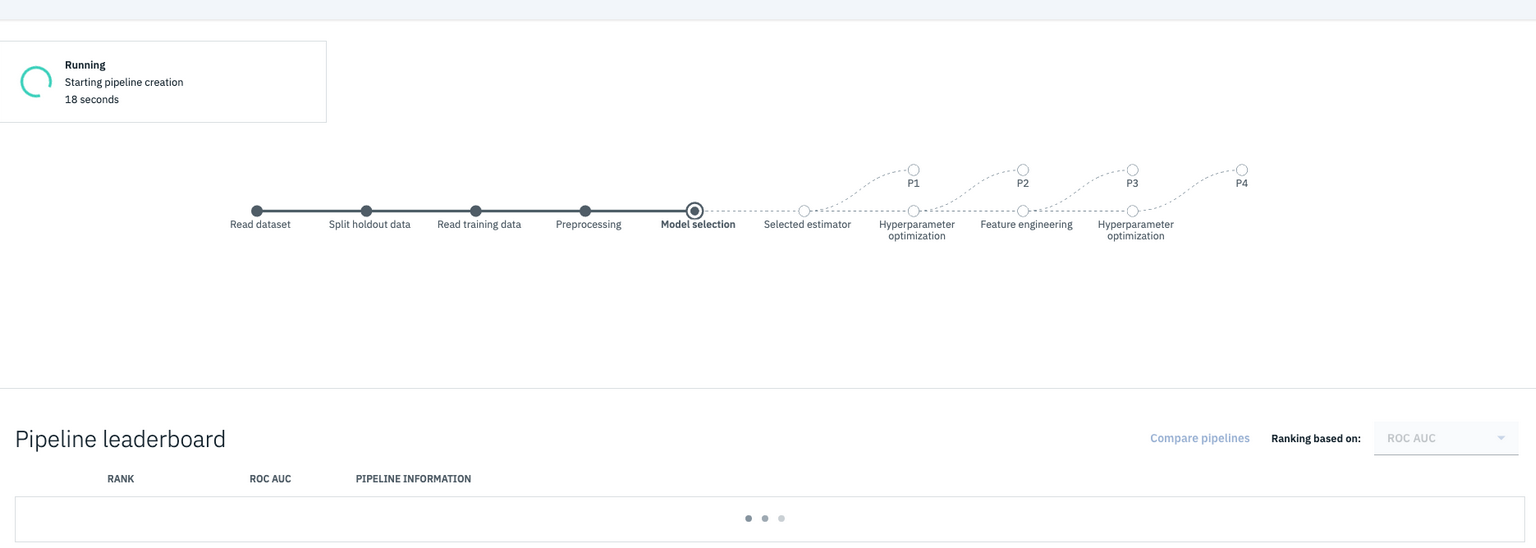

#### After all 4 experiments are run, save one of the models in the project which you would be using going forward. You can compare the performance metrics of 4 models created by going to the 'Compare'. Also, by clicking on individual pipeline you can see all details about each experiment. After Model is saved go back to Asset Tab where you can see the  new Model is saved under Models section

### Step 4 - Model Validation (& Governance)

You can skip this step for this version.  

### Step 5 - Deployment of Model using Watson Machine Learning & Insight Consumption

Once the Model is created, Model needs to be deployed. At first Model can be deployed in Pre-Prod environment and independent validation of the Model can happen. After that Model can be deployed in Production where the prediction from Model can be Infused by consuming Applications.

In this step of the tutorial we shall see how a Model can be deployed and then used by a consuming application over Rest End point. To start with the same please use the Notebook below.

#### <font color=green>*Step 5.a - Model Deployment*</font>

In this sub-step of the tutorial we shall see how a Model can be deployed. To start with the same please use the Notebook below.

In [5]:
# @hidden_cell
nb_name= 'Deployment of Model using Watson Machine Learning'
notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<font size="4"><a href=""" + nb_url + """ target="_blank">""" + "Deployment of Model using Watson Machine Learning" + """</a></font>"""
display(HTML(nb_html_str))

#### <font color=green>*Step 5.b - Insight Consumption*</font>

In this sub-step of the tutorial we shall see how a deployed Model can be called to get Predictions. Here we show how a Python program can be used to call a Model for prediction over REST protocol. To start with the same please use the Notebook below.

In [6]:
nb_name = "Getting Prediction from Model using REST for consuming Insight"
notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<font size="4"><a href=""" + nb_url + """ target="_blank">""" + nb_name + """</a></font>"""
display(HTML(nb_html_str))

### Step 6 - Model Monitoring using Watson Open Scale

In this Step we shall see how the predictions made by a deployed Model can be monitored for Fairness, Accuracy and Drift using Watson Open Scale. 

Also using Watson Open Scale one can Explain each prediction done by the model by indicating the features of the Model those were most important for the Model in arriving at the Prediction.

#### <font color=green>*Step 6.a - Upload Training Data to Db2Wh*</font>

Go back to "Step-2 Data Preparation For Model Development". Ensure the step for Uploading the training data to DB2Wh has been executed.

#### <font color=green>*Step 6.b - Generic Configuration of Open Scale for Datamart and Machine Learning Provider*</font>

This is an one time activity of configuring Watson Open Scale in your CPD cluster for Database and Machine Learning Provider

Go to Openscale url as given below

In [7]:
# @hidden_cell
wos_url = '/aiopenscale'
wos_html_str = """<font size=4><a href=""" + wos_url + """ target="_blank">""" + 'Open Scale Url' + """</a></font>"""
display(HTML(wos_html_str))

Next go to the Notebook below to do necessary configuration by following the instructions in the Notebook

In [8]:
# @hidden_cell

nb_name= 'Configuring Watson Open Scale using UI'
notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<font size="4"><a href=""" + nb_url + """ target="_blank">""" + "Configuring Watson Open Scale using UI" + """</a></font>"""
display(HTML(nb_html_str))

#### <font color=green>*Step 6.c - Configuration of Open Scale for a specific Model*</font>

In this step now you would configure the Open Scale for the Model which you have delpoyed in one of the previous steps. To start with the same please use the Notebook below.

In [9]:
# @hidden_cell

nb_name= 'Configuration of Open Scale for a specific Model'
notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<font size="4"><a href=""" + nb_url + """ target="_blank">""" + "Configuration of Open Scale for a specific Model" + """</a></font>"""
display(HTML(nb_html_str))

#### <font color=green>*Step 6.d - Configuration of Monitors in Watson Open Scale for a specific Model*</font>

In this step we shall configure various Monitors for the Model, namely Fairness, Drift, Accuracy. To start with the same please use the Notebook below.

In [10]:
# @hidden_cell
nb_name = "Configuration of Monitors in Watson Open Scale for a specific Model"
notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<font size="4"><a href=""" + nb_url + """ target="_blank">""" + "Configuration of Monitors in Watson Open Scale for a specific Model" + """</a></font>"""
display(HTML(nb_html_str))

#### <font color=green>*Step 6.e - Sending Multiple Scoring Requests to Model*</font>

In this step, multiple payload scoring requests need to be sent to the Model. Based on those scoring requests the Model Configured for monitoring will start showing the Monitoring Results. In real world the Scoring requests would be sent to the Model by the consuming application in its own time as required. Here we are simulating similar behaviour so that we can generate enough scoring requests to model so that we can see the MOnitoring results from Watson Open Scale. To start with this step please use the Notebook below.

In [11]:
# @hidden_cell

nb_name = "Sending Multiple Scoring Requests to Deployed AutoAI created Model"
notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<font size="4"><a href=""" + nb_url + """ target="_blank">""" + "Sending Multiple Scoring Requests to Deployed AutoAI created Model" + """</a></font>"""
display(HTML(nb_html_str))

#### <font color=green>*Step 6.f - Investigate Monitoring Results using UI of Watson Open Scale*</font>

In this step, you can Investigate Monitoring Results from Watson OpenScale by following the steps in the Notebook below. However, please note that it may take few minutes to few hrs before you start seeing the result.

In [12]:
# @hidden_cell
nb_name = "Investigating Monitoring Results using UI of Watson Open Scale"

notebook_id = guid_from_notebook_name(assts, nb_name)
nb_url = static_url_str1 + notebook_id + static_url_str2 + project_id+static_url_str3
nb_html_str = """<font size="4"><a href=""" + nb_url + """ target="_blank">""" + "Investigating Monitoring Results using UI of Watson Open Scale" + """</a></font>"""
display(HTML(nb_html_str))

### Step 7 - Continuous Integration and Deployment of Models across various Environments

You can skip this step for this version. 

In [13]:
%%HTML
<script>

function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>